In [118]:
# Some plots / Testing the separation reward
MIN_SEPARATION_ALLOWED = 4.0
SEPARATION_COST = 80.0

In [119]:
# Simplest reward structure ... was sufficient for the single-aircraft case
def get_terminal_reward(dist):
    if dist < MIN_SEPARATION_ALLOWED:
        return -1*SEPARATION_COST
    else:
        return 0.0

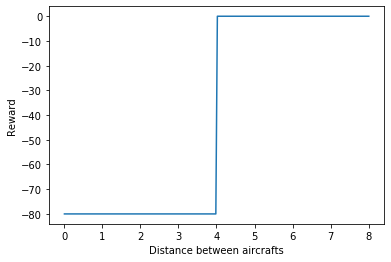

In [120]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.01, 8.0, 200)
y = [get_terminal_reward(x_val) for x_val in x]
plt.plot(x, y)
plt.xlabel("Distance between aircrafts")
plt.ylabel("Reward")
plt.show()

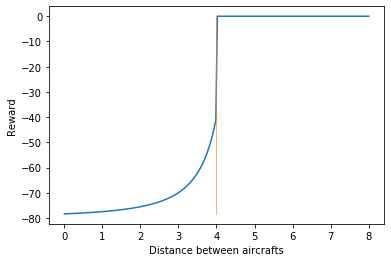

In [126]:
# Rather, we want to nudge the neural net towards higher reward
# which is known to speed up the learning considerably
# We still want a 'jump' at the critical value...
def get_corrected_terminal_reward(dist):
    if dist < MIN_SEPARATION_ALLOWED:
        C1 = SEPARATION_COST*0.5
        C2 = 1.0
        correction = C1/(dist - (MIN_SEPARATION_ALLOWED + C2))**2
        
        return -1*SEPARATION_COST + correction
    else:
        return 0.0
    
y = [get_corrected_terminal_reward(x_val) for x_val in x]
plt.plot(x, y)
plt.xlabel("Distance between aircrafts")
plt.ylabel("Reward")
plt.plot([MIN_SEPARATION_ALLOWED, MIN_SEPARATION_ALLOWED], [np.min(y), np.max(y)], linewidth=0.6)
plt.show()

In [124]:
# So if the reward in the worst case is -1000.0
# reward in the best (among the bad) case is -500.0
# and reward in a good case is 0.0

# The reason why we won't apply this correction to the right half of the function
# is because then the aircraft has incentive to minimize the length of each episode
# (to stop accumulatin6 negative rewards)

# We don't want that to be one of the goals of our ATC (...at least not yet?)

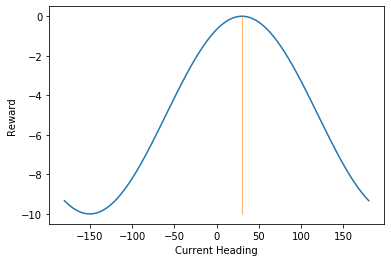

In [127]:
# The reward for deviation / reaching the destination is relatively straightforward
destination_qdr = 30.0
DEVIATION_COST = 10.0
def get_reward_for_deviation(current_heading):
    deviation_factor = np.cos(np.deg2rad(destination_qdr - current_heading)) - 1.0
    return 0.5*DEVIATION_COST*deviation_factor

x = np.linspace(-180.0, 180.0, 500)
y = [get_reward_for_deviation(x_val) for x_val in x]
plt.plot(x, y)
plt.plot([destination_qdr, destination_qdr], [np.min(y), np.max(y)], linewidth=0.6)
plt.xlabel("Current Heading")
plt.ylabel("Reward")
plt.show()

# Vertical line indicates qdr of the destination

In [ ]:
# 

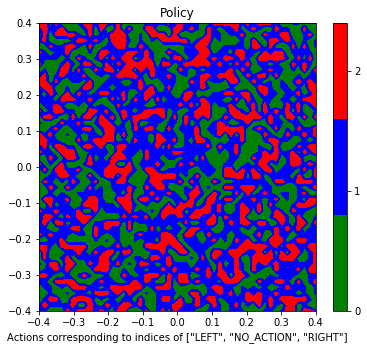

In [15]:
# Some stray code. Avert your eyes!!!

# import os; os.chdir('bluesky')
# from plugins.CR_2AC_classes import Buffer
# import numpy as np
# from bluesky.tools.geo import qdrdist

# class Traf:
#     """
#     Dummy BlueSky-like class for testing get_state()
#     """
#     def __init__(self):
#         self.hdg = [None, None]
#         self.lat = [None, None]
#         self.lon = [None, None]
        
# traf = Traf()()
# import numpy as np
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(6, 5))
# left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
# ax = fig.add_axes([left, bottom, width, height])
# x_list = np.linspace(-0.4, 0.4)
# y_list = np.linspace(-0.4, 0.4)
# X, Y = np.meshgrid(x_list, y_list)
# Z = []
# for x in x_list:
#     Z.append([])
#     for y in y_list:
#         Z[-1].append(np.random.randint(0, 3))
# cp = plt.contourf(X, Y, Z, 2, colors=['g','b', 'r'])
# plt.colorbar(cp, ticks=[0,1,2])
# ax.set_title('Policy for an aircraft at 0, 0')
# ax.set_xlabel('Actions corresponding to indices of ["LEFT", "NO_ACTION", "RIGHT"]')
# plt.show()

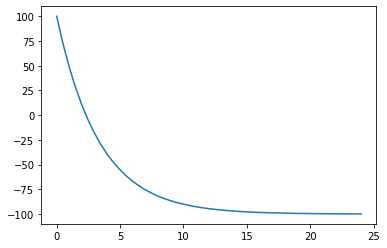

In [20]:
TERMINAL_REWARD = 100.0
def get_terminal_reward(dist):
    return 2*TERMINAL_REWARD*(np.exp(-0.3*dist) - 0.5)
x = np.linspace(0, 24)
plt.plot(x, [get_terminal_reward(_x) for _x in x])